# Влияние социальных и экономических параметров заемщика на факт погашения кредита в срок

**Заказчик** — кредитный отдел банка. 

**Цель исследования** 
 - подтвердить или опровернгуть гипотезы о влиянии на факт погашения кредита в срок следующих аспектов:
     * наличие и количество детей у заемщика;
     * его семейное положение;
     * уровень ежемесячного дохода;
     * цель получения денежных средств.


**Ход исследования** 

От кредитного отдела банка получен файл формата .csv — статистика о платёжеспособности клиентов. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Исправим ошибки, где это возможно.
Таким образом, исследование пройдёт в три этапа:

- Обзор данных.
- Предобработка данных.
- Проверка гипотез.

**Результаты исследования** 

Будут учтены при построении модели кредитного скоринга —  полностью автоматизированного метода анализа данных заявителей, который поможет значительно сократить время рассмотрения заявки на кредит. Скоринговые программы разрабатываются индивидуально каждым банком на основании его лояльности и рискованности.

Скоринг — это оценка рисков банка, которая выражается в баллах. За каждый пункт заполненной анкеты система ставить определенное количество баллов. Для одобрения или перехода заявки на следующий этап рассмотрения клиент должен набрать минимально допустимое количество баллов. 

Оценке подлежат все пункты анкеты, следовательно нужно избегать пропусков в данных.


## Обзор данных

Основной инструмент аналитика — `pandas`, для визуализации - `seaborn`, для лемматизации - `Mystem`. Импортируем эти библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
from pymystem3 import Mystem
m = Mystem()

Откроем датасет и получим общую информацию о данных, применив метод **.info()**:

In [2]:
data = pd.read_csv('/datasets/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


* В таблице 12 столбцов; 
* Представлены следующие типы данных: `int64`, `float64`, `object`;
* В названиях столбцов нет нарушений;
* Количество значений в столбцах различается. Значит, в данных есть пропущенные значения;
* Нет столбца с персональным ID клиента, это может повлиять на поиск дубликатов.

**Согласно документации к данным:**

- `children` — количество детей в семье;
- `days_employed` — общий трудовой стаж в днях;
- `dob_years` — возраст клиента в годах;
- `education` — уровень образования клиента;
- `education_id` — идентификатор уровня образования;
- `family_status` — семейное положение;
- `family_status_id` — идентификатор семейного положения;
- `gender` — пол клиента;
- `income_type` — тип занятости;
- `debt` — имел ли задолженность по возврату кредитов;
- `total_income` — ежемесячный доход;
- `purpose` — цель получения кредита

Выведем первые 5 строк таблицы методом **.head()**:

In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


### Вывод
- В каждой строке таблицы - данные одного заемщика. 
- Часть колонок описывает его социальный статус (наличие семьи, детей, образование, пол), другая часть - его финансовые-экономические характеристики (рабочий стаж, тип занятости, ежемесячный доход, задолженности и цель получения кредита).
- Колонки `education` и `family_status` сопровождаются колонками идентификаторами. 
- Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных.

## Предобработка данных

### Поиск и заполнение пропущенных значений:

Применим метод **.isna()** к нашему датафрейму, чтобы обнаружить пропущенные значения в данных. Сумируем их количество методом **.sum()**:

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропущены значения в столбцах `days_employed` и `total_income`:
- оба столбца имеют тип данных - `float64`, значит пропуски, найденные методом **.isna()**, имеют тип NaN;
- строки с пропусками составляют более 10% от датасета; 
- это количественные переменные, значит заполняем пропуски в них с помощью одного из методов описательной статистики: среднего арифметического или медианы;
- проанализируем данные этих столбцов для выявления лучшего метода.

#### 'total_income'

Применим методы **.max(), .min(), .mean(), .median()** и найдем максимальное и минимальное, среднее и медианное значения ежемесячного дохода, обернем результат методом **.int()** для округления значений:

In [5]:
print('Максимальное значение ежемесячного дохода:', int(data['total_income'].max()))
print('Минимальное значение ежемесячного дохода:', int(data['total_income'].min()))
print('Среднее значение ежемесячного дохода:', int(data['total_income'].mean()))
print('Медианное значение ежемесячного дохода:', int(data['total_income'].median()))

Максимальное значение ежемесячного дохода: 2265604
Минимальное значение ежемесячного дохода: 20667
Среднее значение ежемесячного дохода: 167422
Медианное значение ежемесячного дохода: 145017


Минимальное и максимальное значения отличаются друг от друга на 3 порядка, заполнение пропусков средним или медианным значением всего столбца может значительно исказить данные и повлиять на результат анализа. Величина ежемесячного дохода часто связана с типом занятости и уровнем образования. Эти данные есть в датасете. Сгруппируем методом **.groupby()** уровень дохода по типу занятости и найдем среднее арифметическое методом **.mean()** для каждого:

In [6]:
data_mean = data.groupby('income_type')['total_income'].mean()
print(data_mean)

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        170898.309923
компаньон          202417.461462
пенсионер          137127.465690
предприниматель    499163.144947
сотрудник          161380.260488
студент             98201.625314
Name: total_income, dtype: float64


Сгруппируем уровень дохода по типу занятости и найдем медиану методом **.median()** для каждого значения:

In [7]:
data_median = data.groupby('income_type')['total_income'].median()
display(data_median)

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

Сравнивая результаты выполнения методов среднего арифметического и медианы, видно, что некоторые значения (безработный, в декрете, предприниматель, студент) остались без изменения, остальные (госслужащий, компаньон, пенсионер, сотрудник), при подсчете методом среднего арифметического, выше, чем медианой. Сгруппируем и посчитаем мнтодом **.count()** количество клиентов по типам занятости:

In [8]:
data_count = data.groupby('income_type')['total_income'].count()
display(data_count)

income_type
безработный            2
в декрете              1
госслужащий         1312
компаньон           4577
пенсионер           3443
предприниматель        1
сотрудник          10014
студент                1
Name: total_income, dtype: int64

Значения среднего арифметического и медианы равны по типам занятости (безработный, в декрете, предприниматель, студент) т.к. расчет на выборках из 1 и 2 значений равен для обоих методов.

Различия значений среднего арифметического и медианы по типам занятости появляются на больших выборках и могут быть обусловлены тем, что медиана невелирует влияние выбросов, когда в среднее арифметическое они попадают. 

Таким образом, если мы выберем заполнение пропусков средним арифметическим значением (с более высокими доходом), то создадим более оптимистичную картину, что может увеличить риски для банка.  

Благодаря группировке по типу занятости и заполнению пропусков медианным значением, мы охватим все уровни дохода, но избавимся от выбросов.

Для заполнения пропусков используем метод **.fillna()**, которому передаем значения столбца 'total_income', сгруппированные по 'income_type'. Метод **.transform()** позволяет применить функцию 'median' для замены в разрезе групп:

In [9]:
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))

Проверяем наличие пропусков:

In [10]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

#### 'days_employed'

Обратим внимание на значения в данном столбце:
- есть положительные и отрицательные значения
- есть значительные расхождения по модулю значений
- согласно документации к данным: `days_employed` — общий трудовой стаж в днях


In [11]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Данные в столбце 'days_employed' имеют неоднородную структуру. Для их анализа прибегаем к помощи графика боксплот (**.boxplot()**), на котором хорошо заменты "проблемные места" и мы можем сформировать следующие гипотезы:
- если значение меньше нуля, то оно представлено в днях, как в описании;
- значения выше нуля на 2 порядка больше, чем те, что ниже, они представлены в часах.

<AxesSubplot:xlabel='days_employed'>

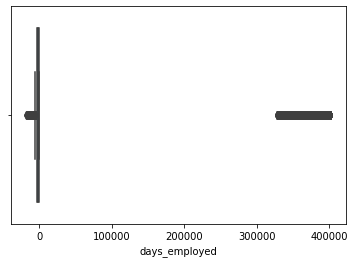

In [12]:
sns.boxplot(data=data, x='days_employed')

Приведем все данные столбца 'days_employed' к одному виду. Значения, выраженные в часах, переведем в дни, отрицательные значения сделаем положительными:

In [13]:
data.loc[data['days_employed'] > 0, 'days_employed'] /= 24
data.loc[data['days_employed'] < 0, 'days_employed'] /= -1
display(data.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Построим график боксплот по новым данным:

<AxesSubplot:xlabel='days_employed'>

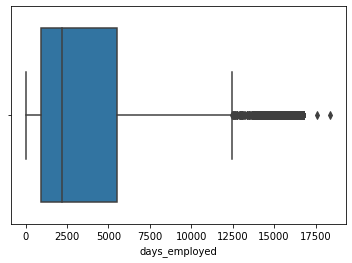

In [14]:
sns.boxplot(data=data, x='days_employed')

Все значения теперь больше нуля, разброс по значениям преодолен, хотя все еще присутствуют выбросы, посмотрим их природу: 
  * создаем фильтр по значениям рабочего стажа в днях больше 12500 дней, что соответствует примерно 34 годам;
  * группируем по типу занятости

In [15]:
data_many_days = data[data['days_employed'] > 12500]
display(data_many_days.head())
data_many_days.groupby('income_type')['days_employed'].count()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
18,0,16678.380705,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,14106.331371,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,15147.853723,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
30,1,13982.569521,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью


income_type
безработный       2
госслужащий      13
компаньон        13
пенсионер      3443
сотрудник        44
Name: days_employed, dtype: int64

Предсказуемо, эта выборка сформирована почти полностью из пенсионеров, отсюда долгий стаж работы. Надо отметить, что выборка составляет 16% от всего датасета, вероятно различие между медианой и средним арифметическим будет существенным. Посмотрим, есть ли в ней пропущенные значения:

In [16]:
data_many_days['days_employed'].isna().sum()

0

Обратимся к методам описательной статистики и найдем максимальный, минимальный, средне арифметический и медианный стаж работы:

In [17]:
print(f'Максимальное значение трудового стажа:', int(data['days_employed'].max()), 'дн.,', int((data['days_employed'].max()) / 365), 'лет')
print(f'Минимальное значение трудового стажа:', int(data['days_employed'].min()), 'дн.,', int((data['days_employed'].min()) / 365), 'лет') 
print(f'Среднее значение трудового стажа:', int(data['days_employed'].mean()), 'дн.,', int((data['days_employed'].mean()) / 365), 'лет')
print(f'Медианное значение трудового стажа:', int(data['days_employed'].median()), 'дн.,', int((data['days_employed'].median()) / 365), 'лет')


Максимальное значение трудового стажа: 18388 дн., 50 лет
Минимальное значение трудового стажа: 24 дн., 0 лет
Среднее значение трудового стажа: 4641 дн., 12 лет
Медианное значение трудового стажа: 2194 дн., 6 лет


Мы выяснили природу выбросов - долгий стаж работы клиентов пенсионного возраста, кроме этого в них нет пропусков, поэтому ограничим их влияние, выбрав медиану, как метод заполнения пропусков. Используем метод **.fillna()** и проверим наличие пропусков:

In [18]:
data['days_employed'] = data['days_employed'].fillna(2194)
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Есть предположение, что такая неоднородная структура данных, с отрицательными и положительными значениями и различиями в единицах измерения, была разработана специально, как (неэффективный) метод категоризации клиентов. Для быстроты и удобства анализа следует хранить значения в столбцах в одинаковых единицах измерения.

#### 'dob_years'

In [19]:
print('Максимальный возраст заемщика:', data['dob_years'].max())
print('Минимальный возраст заемщика:', data['dob_years'].min())
print('Медианный возраст заемщика:', int(data['dob_years'].median()))
print('Средне арифметический возраст заемщика:', int(data['dob_years'].mean()))

Максимальный возраст заемщика: 75
Минимальный возраст заемщика: 0
Медианный возраст заемщика: 42
Средне арифметический возраст заемщика: 43


Мы нашли неадекватное значение возраста заемщика - 0 лет. Посмотрим, как распределяется возраст в нашем датафрейме. Сгруппируем столбец 'dob_years' по 'income_type' 

In [20]:
data.groupby('dob_years')['income_type'].count()

dob_years
0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: income_type, dtype: int64

<AxesSubplot:xlabel='dob_years'>

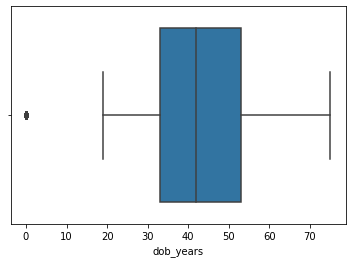

In [21]:
sns.boxplot(data=data, x='dob_years')

В целом распределение по возрасту нормальное, за исключение небольшого выброса в 101 строку с нулевым значением возраста заемщика. Поскольку распределение близкое к нормальному, среднее арифметическое и медиана близки по значению, 42 и 43 года соответственно. Выберем для заполнения нулевых значений медиану, что бы не учитывать выброс. В этом случае пропуски имеют не стандартное значение, следовательно для их заполнения воспользуемся методом **.loc()**:

In [22]:
data.loc[data['dob_years'] == 0, 'dob_years'] = 42

<AxesSubplot:xlabel='dob_years'>

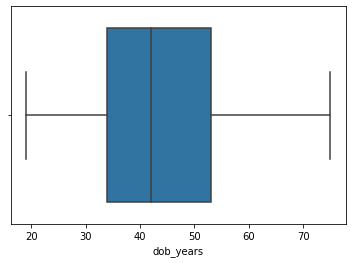

In [23]:
sns.boxplot(data=data, x='dob_years')

Как видно на графике, в данных о возрасте потенциальных заемщиков больше нет нулевых значений. Причина возникновения таких пропусков - человеческий фактор.

#### Вывод

Данные, полученные от кредитного отдела банка имеют очевидные пропуски в данных по ежемесячному доходу и в данных о рабочем стаже заемщика (более 10% от всего объема данных). Кроме того обнаружены нулевые значения в данных о возрасте (не более 0,5% от всего объема). Все три показателя имеют влияние на распределение баллов скоринговой системы:

 * `стаж работы` - чем дольше, тем больше баллов, именно поэтому незаполнение пропусков ухудшит картину по всему датасету, а заполнение средним арифметическим, наоборот сделает ее слишком оптимистичной, следовательно выбираем медиану.
 
 * `ежемесячный доход` - чем выше, тем больше баллов, следуя той же логике, заполняем медианой.
 
 * `возраст` - наибольший бал получают клиенты среднего возраста, а наименьший — молодые заявители, кредит выдают с 18 лет, поэтому нулевых значений быть не должно. Заменяем их медианой.


### Изменение типа данных

Изменяем вещественный тип данных в столбцах `days_employed` и `total_income` на целочисленный, используем метод **.astype()**, который позволяет перевести значения типа float в int: 

In [24]:
data['days_employed'] = data['days_employed'].astype('int64')
data['total_income'] = data['total_income'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


Изменение типа данных на целочисленный сделает таблицу более 'чистой' и легкочитаемой.

### Удаление дубликатов

#### Грубые дубликаты:

In [25]:
data.duplicated().sum()

55

Появление грубых дубликатов (повторов) в нашем датафрейме возможно из-за:  
 * отсутствует какой-либо идентификационный номер клиента;
 * после заполнения средним значением, могли образоваться строки с абсолютно одинаковыми данными;
 * количество явных дубликатов очень мало в объеме всего датасета.

Таким образом оставим их как есть.


#### Найдем неявные дубликаты:

Проверим столбцы со строковыми значениями `object` на дубликаты:

##### 'education '

- используем метод **.value_counts()**, который анализирует столбец, выбирает каждое уникальное значение и подсчитывает частоту его встречаемости в списке:

In [26]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Избавимся от дубликатов методом **.str_lower()**, который приводит символы к нижнему регистру и проверим результат:

In [27]:
data['education'] = data['education'].str.lower()
data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

##### 'family_status'

In [28]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Приведем для единообразия к нижнему регистру:

In [29]:
data['family_status'] = data['family_status'].str.lower()
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

##### 'income_type'

In [30]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

##### 'purpose' : лемматизация и категоризация

С помощью метода **.value_counts()** найдем все уникальные значения столбца 'purpose' и частоту их появления в списке:

In [31]:
purpose_cases = data['purpose'].value_counts()
print(purpose_cases)

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Согласно данным столбца, частота появления каждого значения распределена равномерно,нет неиспользуемых значений, тем не менее многие значения очень схожи по смыслу, т.е. являются замаскированными повторами. К примеру значения строк 'на покупку своего автомобиля', 'приобретение автомобиля', 'на покупку автомобиля' было бы полезно объединить под одно название, но в столбце мы видим и более общие варианты, такие как 'автомобиль' и не можем быть уверены имеется ли в виду его покупка, ремонт и др. Для целей нашего анализа подойдет достаточно грубая категоризация: 'свадьба', 'автомобиль', 'жилье и недвижимость', 'образование'. 

Для того, чтобы осуществить такую категоризацию, необходимо привести слова каждого уникального значения столбца 'purpose' к их словарной форме - лемме - и отфильтровать значения столбца по выбранным ключевым словам.

С помощью метода **.unique()** получаем список уникальных значений столбца 'purpose':

In [32]:
purpose_list = data['purpose'].unique()

In [33]:
print(purpose_list)

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


Проходим по нему циклом **for**, приводя к лемме каждое значение:

In [34]:
for value in purpose_list:
    lemma = m.lemmatize(value)
    print(lemma)


['покупка', ' ', 'жилье', '\n']
['приобретение', ' ', 'автомобиль', '\n']
['дополнительный', ' ', 'образование', '\n']
['сыграть', ' ', 'свадьба', '\n']
['операция', ' ', 'с', ' ', 'жилье', '\n']
['образование', '\n']
['на', ' ', 'проведение', ' ', 'свадьба', '\n']
['покупка', ' ', 'жилье', ' ', 'для', ' ', 'семья', '\n']
['покупка', ' ', 'недвижимость', '\n']
['покупка', ' ', 'коммерческий', ' ', 'недвижимость', '\n']
['покупка', ' ', 'жилой', ' ', 'недвижимость', '\n']
['строительство', ' ', 'собственный', ' ', 'недвижимость', '\n']
['недвижимость', '\n']
['строительство', ' ', 'недвижимость', '\n']
['на', ' ', 'покупка', ' ', 'подержать', ' ', 'автомобиль', '\n']
['на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', '\n']
['операция', ' ', 'с', ' ', 'коммерческий', ' ', 'недвижимость', '\n']
['строительство', ' ', 'жилой', ' ', 'недвижимость', '\n']
['жилье', '\n']
['операция', ' ', 'со', ' ', 'свой', ' ', 'недвижимость', '\n']
['автомобиль', '\n']
['заниматься', ' ', 'образование'

Как мы видим, все слова приведены к их начальной форме, в каждой подстроке встречается одно из определенных выше значений: автомобиль, свадьба, жилье, недвижимость, образование. 

Создадим функцию, котороя проходит по столбцу `purpose`, лемматизирует слова и выполняет одно из условий категоризации:

In [36]:
def category_lemma_purpose(row):
    lemma_purpose = m.lemmatize(row['purpose'])
    if 'свадьба' in lemma_purpose:
        return 'свадьба'
    if ('жилье' in lemma_purpose) or ('недвижимость' in lemma_purpose ):
        return 'недвижимость'
    if 'образование' in lemma_purpose:
        return 'образование'
    if 'автомобиль' in lemma_purpose:
        return 'автомобиль'

Создадим новый столбец в таблице `purpose_category`, в котором отразим результат работы функции **category_lemma_puprose** на данных слотбца `purpose`, выведем первые 10 строк датафрейма:

In [37]:
data['purpose_category'] = data.apply(category_lemma_purpose, axis=1)

In [38]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба


In [39]:
purpose_cases = data['purpose_category'].value_counts()
print(purpose_cases)

недвижимость    10840
автомобиль       4315
образование      4022
свадьба          2348
Name: purpose_category, dtype: int64


Мы категоризировали каждую строку датасета, получили 4 основные цели заявок на кредит, таким образом упростилась визуальная работа с таблицей.

##### 'children'

In [40]:
display(data['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Мы встречаем дубликаты и в столбце `children`, очевидно, что невозможно иметь -1 ребенка, имеется в виду 1. Избавимся от отрицательных значений методом **.abs()**, который на выходе отдает значения по модулю. Проверим изменения:

In [41]:
data['children'] = abs(data['children'])
display(data['children'].value_counts())

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

Посмотрим строки, где количество детей равно 20:

In [42]:
display(data[data['children'] == 20].head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
606,20,880,21,среднее,1,женат / замужем,0,M,компаньон,0,145334,покупка жилья,недвижимость
720,20,855,44,среднее,1,женат / замужем,0,F,компаньон,0,112998,покупка недвижимости,недвижимость
1074,20,3310,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518,получение образования,образование
2510,20,2714,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474,операции с коммерческой недвижимостью,недвижимость
2941,20,2161,42,среднее,1,женат / замужем,0,F,сотрудник,0,199739,на покупку автомобиля,автомобиль


Невозможно сказать наверняка, это ошибка ввода (20 вместо 2) или нет. Возраст заемщика не всегда логически совпрадает с количеством детей, например 20 детей в 21 год. Тем не менее нельзя исключать обращение за кредитом родителей с приемными детьми. Этих значений всего 76, что не является значимым для нашего анализа, оставляем как есть.

##### 'debt'

In [43]:
print(data['debt'].value_counts())

0    19784
1     1741
Name: debt, dtype: int64


Столбец `debt` без дубликатов. Мы видим, что 8,8% заявителей имеют задолженность по кредиту.

##### 'gender'

In [44]:
print(data['gender'].value_counts())
display(data[data['gender'] == 'XNA'])

F      14236
M       7288
XNA        1
Name: gender, dtype: int64


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
10701,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости,недвижимость


Если мы придадим значению этой строки M или F, это не скажется на результатах анализа, но позволит сделать таблицу чище, применим метод **.replace()**, где первое значение - нежелательное, а второе - то, которое заменит первое:

In [45]:
data['gender'] = data['gender'].replace('XNA', 'F')

In [46]:
print(data['gender'].value_counts())

F    14237
M     7288
Name: gender, dtype: int64


#### Вывод

Мы проверили столбцы со строковыми значениями на дубликаты. 
* В столбцах `education` и `family_status`, было достаточно привести к нижнему регистру все значения, что бы избавиться от дубликатов. 
* Столбец `purpose` оставлен как есть, но на его данных сформирован новый `purpose_category` с более грубой, но эффективной категоризацией. 
* Кроме этого, мы устранили отрицательное значение в столбце `children` и неизвестный признак пола в столбце `gender`.

Все эти операции помогут нам избежать серьезных и с трудом обнаруживаемых ошибок в анализе, а также уменьшить время обработки данных.

## Анализ влияния различных факторов на своевременное погашение задолженности

#### 'children'/'debt'

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Посмотрим, как распределяются случаи невозврата кредита в зависимости от количества детей. Создадим сводную таблицу методом **.pivot_table()**, где индексом выступят значения столбца `children`, группировка пройдет по стобцу `debt`, столбц `education` для подсчета строк, и применяемая к этим значениям функция count: 

In [47]:
children_pivot = data.pivot_table(index='children', columns= 'debt', values='education', aggfunc='count')
display(children_pivot)

debt,0,1
children,,
0,13086.0,1063.0
1,4420.0,445.0
2,1861.0,194.0
3,303.0,27.0
4,37.0,4.0
5,9.0,NaN
20,68.0,8.0


Для визуализации используем столбчатую диаграмму, передаем функции .barplot() заранее созданный список количества детей `children_number` как **x**, а значения столбца `1` таблицы `children_pivot` как **y**. Выведем резельтат в цветовой палитре 'Blues':

<AxesSubplot:ylabel='1'>

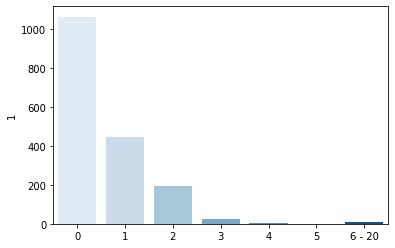

In [48]:
children_number = ['0', '1', '2', '3', '4', '5', '6 - 20']
sns.barplot(x = children_number, y = children_pivot[1], palette='Blues')

Согласно графика, есть близкая к линейной зависимость наличия/количества детей и невозвратом кредита. Более склонны к задержкам по платежам бездетные заявители. А с появлением детей благонадежность потенциального клиента растет. Стоит проверить, насколько эта гипотеза верена. 

Посчитаем процент невозвратов от общего количества обращений в разрезе количества детей. Добавим новый столбец `debt_percent` и заполним его данными, обернем столбец функцией **round()**, для округления:

In [49]:
children_pivot['debt_percent'] = round((children_pivot[1] * 100) / (children_pivot[1] + children_pivot[0]), 1)
display(children_pivot)

debt,0,1,debt_percent
children,,,
0,13086.0,1063.0,7.5
1,4420.0,445.0,9.1
2,1861.0,194.0,9.4
3,303.0,27.0,8.2
4,37.0,4.0,9.8
5,9.0,NaN,NaN
20,68.0,8.0,10.5


<AxesSubplot:ylabel='debt_percent'>

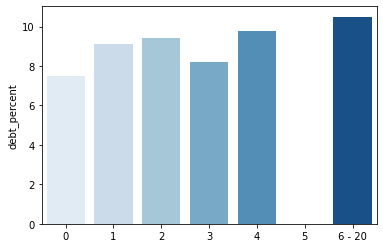

In [50]:
children_number = ['0', '1', '2', '3', '4', '5', '6 - 20']
sns.barplot(x = children_number, y = children_pivot['debt_percent'], palette='Blues')

##### Вывод

* На столбчатой диаграмме barplot видно, что наша гипотеза о росте благонадежности с ростом количества детей не подтвердилась.
* Наоборот, бездетные заемщики более ответственные клиенты, они не возвращают кредит в срок только в 7.5% случаев, когда наличие хотя бы одного ребенка сразу повышает эту вероятность до 9.1%. Это связано с тем что наличие детей налагает на человека повышенные финансовые обязательства и, по факту, снижает его платежеспособность. 
* Из графика так же видно, что из всех родителей, самые благонадежные те, у которых трое детей. 

#### 'family_status'/'debt'

- Есть ли зависимость между семейным положением и возвратом кредита в срок? 

Сформируем сводную таблицу, расчитаем процент невозвратов от общего количества обращений в разрезе семейного положения, чтобы определить какой образ отношений предпочтительнее иметь заемщику:

In [51]:
family_pivot = data.pivot_table(index='family_status', columns= 'debt', values='education', aggfunc='count')
family_pivot['debt_percent'] = round((family_pivot[1] * 100) / (family_pivot[1] + family_pivot[0]), 1)
display(family_pivot)

debt,0,1,debt_percent
family_status,,,
в разводе,1110,85,7.1
вдовец / вдова,897,63,6.6
гражданский брак,3789,388,9.3
женат / замужем,11449,931,7.5
не женат / не замужем,2539,274,9.7


Визуализируем результат с помощью столбчатой диаграммы:

<AxesSubplot:xlabel='debt_percent'>

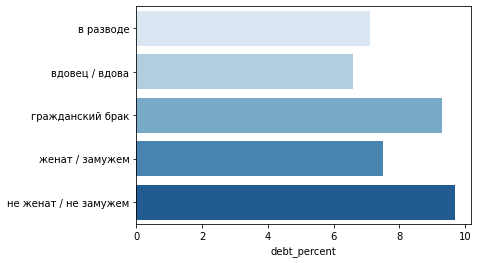

In [52]:
family_status_unique = ['в разводе','вдовец / вдова', 'гражданский брак', 'женат / замужем', 'не женат / не замужем']
sns.barplot(x = family_pivot['debt_percent'], y = family_status_unique, palette='Blues')

Самые ответственные плательщики - это разведенные и вдовцы, они имеют задолженность в 7.1 и 6.6% случаев соответственно. Напротив холостые и живущие в гражданском браке опаздывают с оплатой в более чем 9% случаев. Самая многочисленная группа заемщиков - женатые (более половины всех клиентов), их показатель на уровне 7.5%. Посмотрим средний возраст в разрезе семейного положения, для этого сгруппируем датасет по столбцу `family_status` и узнаем медианные значения возраста:

In [53]:
family_status_age = data.groupby('family_status')['dob_years'].median()
display(family_status_age)

family_status
в разводе                46
вдовец / вдова           58
гражданский брак         41
женат / замужем          43
не женат / не замужем    36
Name: dob_years, dtype: int64

##### Вывод

* Наличие семьи значительно влияет на ответственность клиента. 41 и 43 - средний возраст живущих в гражданском и традиционном браке близок, т.е. мы можем смело сравнить уровни их задолженностей. Клиенты, состоящие в традиционном браке имеют задолженность на уровне 7.5%, а в гражданском - на 9.3%. 
* Ожидаемо средний возраст по категории вдовец/вдова самый большой из выборки, 58 лет. Обычно пожилые люди консервативны и обладают высоким уровнем ответственности, соответственно опозданий по оплате меньше, всего 6.6%.
* Неженатые, напротив, самые молодые заемщики. Это категория людей, с самой высокой изменчивостью в образе жизни, выборе работы, месте жительства. Уровень ответственности и осознанности ниже, чем у людей с опытом, отсюда самый высокий процент по задолженностям, 9.7%.

#### 'total_income' / 'debt'

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Для того, чтобы проанализировать столбец c уровенем дохода, категоризируем его данные. Создадим функцию **income_group()**, на входе она получает строку с суммой ежемесячного дохода, а отдает категорию уровня дохода. Обратимся к графику boxplot, что бы понять, как разделить эти данные на категории:

<AxesSubplot:xlabel='total_income'>

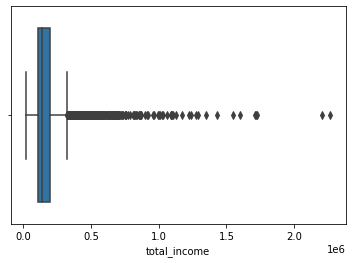

In [54]:
sns.boxplot(data=data, x='total_income')

Сделаем категоризацию с шагом в 50 тысяч до порога 500 тысяч, далее соберем все данные вместе в группу от 500 до 2500 тысяч:

In [55]:
def income_group(total_income):
    
    if total_income < 50000:
        return 'a < 50'
    if total_income < 100000:
        return 'b < 100'
    if total_income < 150000:
        return 'c < 150'
    if total_income < 200000:
        return 'd < 200'
    if total_income < 250000:
        return 'e < 250'
    if total_income < 300000:
        return 'f < 300'
    if total_income < 350000:
        return 'g < 350'
    if total_income < 400000:
        return 'k < 400'
    if total_income < 450000:
        return 'l < 450'
    if total_income < 500000:
        return 'm < 500'
    if total_income < 2500000:
        return 'n < 2500'

Применим функцию **income_group** к столбцу `total_income`, для этого воспользуемся методом .apply():

In [57]:
data['income_grouped'] = data['total_income'].apply(income_group)
display(data.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,income_grouped
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,f < 300
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,c < 150
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,c < 150
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,f < 300
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,d < 200


In [58]:
income_pivot = data.pivot_table(index='income_grouped', columns= 'debt', values='education', aggfunc='count')
income_pivot['debt_percent'] = round((income_pivot[1] * 100) / (income_pivot[1] + income_pivot[0]), 1)
display(income_pivot)

debt,0,1,debt_percent
income_grouped,,,
a < 50,349,23,6.2
b < 100,3760,331,8.1
c < 150,6598,624,8.6
d < 200,4368,405,8.5
e < 250,2090,164,7.3
f < 300,1242,88,6.6
g < 350,573,51,8.2
k < 400,306,24,7.3
l < 450,183,13,6.6


<AxesSubplot:ylabel='debt_percent'>

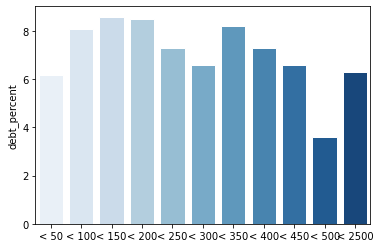

In [59]:
income_levels = ['< 50', '< 100', '< 150', '< 200', '< 250', '< 300', '< 350', '< 400', '< 450', '< 500', '< 2500']
sns.barplot(x = income_levels, y = income_pivot['debt_percent'], palette = 'Blues', edgecolor = 'w')

Все выборки содержат более 30 строк, поэтому будем считать эти данные статистически верными. Нельзя проследить линейную зависимость уровня дохода и задолеженности по кредиту. Узнаем, почему заемщики с самым низким доходом имеют задолженность на относительно низком уровне в 6.2%. Сгруппируем данные столюца с категоризированными значениями дохода в разрезе среднего возраста заемщика:

In [60]:
income_age = data.groupby('income_grouped')['dob_years'].median()
print(income_age)

income_grouped
a < 50      52
b < 100     45
c < 150     43
d < 200     41
e < 250     41
f < 300     42
g < 350     42
k < 400     42
l < 450     42
m < 500     42
n < 2500    42
Name: dob_years, dtype: int64


Вероятно, в группу `a` попали, в основном, пенсионеры с невысоким доходом, но отличающиеся благонадежностью. Какое то влияние они оказали и на группу `b`. Средний возраст остальных заемщиков варьируется от 41 до 43 лет. 

Рассмотрим подробнее группу клиентов `m` с доходом от 450 до 500 тысяч, чтобы найти, почему у этой группы такой низкий показатель по задолженности, всего 3.6%. Применим логическую индексацию для фильтрации:

In [61]:
group_m = data.loc[data.loc[:, 'income_grouped'] == 'm < 500']
display(group_m.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,income_grouped
151,0,896,37,высшее,0,гражданский брак,1,F,компаньон,0,463089,сыграть свадьбу,свадьба,m < 500
474,0,4209,46,высшее,0,в разводе,3,M,компаньон,0,490271,недвижимость,недвижимость,m < 500
508,0,2894,59,среднее,1,женат / замужем,0,M,сотрудник,0,472106,строительство недвижимости,недвижимость,m < 500
721,2,13993,62,высшее,0,женат / замужем,0,F,пенсионер,0,486658,недвижимость,недвижимость,m < 500
804,0,7456,48,среднее,1,женат / замужем,0,F,компаньон,0,462677,покупка коммерческой недвижимости,недвижимость,m < 500


Рассмотрим их задолженность в разрезе семейного статуса: 

In [62]:
m_pivot = group_m.pivot_table(index='family_status', columns= 'debt', values='gender', aggfunc='count')
display(m_pivot)

debt,0,1
family_status,,
в разводе,4.0,NaN
вдовец / вдова,1.0,NaN
гражданский брак,21.0,NaN
женат / замужем,65.0,4.0
не женат / не замужем,16.0,NaN


В разрезе количества детей:

In [63]:
m_pivot = group_m.pivot_table(index='children', columns= 'debt', values='gender', aggfunc='count')
display(m_pivot)

debt,0,1
children,,
0,70.0,3.0
1,17.0,NaN
2,16.0,1.0
3,3.0,NaN
4,1.0,NaN


In [64]:
m_pivot = group_m.pivot_table(index='education', columns= 'debt', values='gender', aggfunc='count')
display(m_pivot)

debt,0,1
education,,
высшее,54.0,2.0
начальное,1.0,NaN
неоконченное высшее,NaN,1.0
среднее,52.0,1.0


Судя по результатам, эту выборку попали в большинстве своем женатые, но бездетные клиенты. Оба этих показателя влияют позитивно на факт возвращения долга в срок. А вот уровень образования в данной ситуации не влият, т.к. распределился он практически пополам между высшим и средним.

##### Вывод

Согласно результатов анализа столбца 'total_income', нам не удается проследить строгую зависимость возврата средств в срок и уровеня дохода. Например клиенты с наименьшим доходом (< 50 тысяч) ответственнее тех, у кого он около 150 тысяч. Клиенты с доходом примерно в 500 тысяч выглядят самыми надежными заемщиками, процент задолженностей по ним всего 3.6%, в то же время самые обеспеченные клиенты имеют этот показатель почти на 3% выше! 
Вероятно, кредитному отделу банка надо ориентироваться уровень дохода не как на показатель надежности клиента, а отталкиваться от него для расчета величины суммы займа.

#### 'purpose' / ''debt'

- Как разные цели кредита влияют на его возврат в срок?

Сформируем сводную таблицу, расчитаем процент невозвратов от общего количества обращений в разрезе целей кредитования, чтобы определить к кредитам какого типа клиенты относятся более халатно:

In [65]:
purpose_pivot = data.pivot_table(index='purpose_category', columns= 'debt', values='education', aggfunc='count')
purpose_pivot['debt_percent'] = round((purpose_pivot[1] * 100) / (purpose_pivot[1] + purpose_pivot[0]), 1)
display(purpose_pivot)

debt,0,1,debt_percent
purpose_category,,,
автомобиль,3912,403,9.3
недвижимость,10058,782,7.2
образование,3652,370,9.2
свадьба,2162,186,7.9


<AxesSubplot:ylabel='debt_percent'>

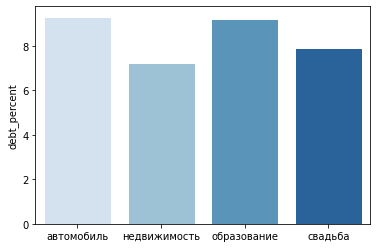

In [66]:
purpose_categories = ['автомобиль', 'недвижимость', 'образование', 'свадьба']
sns.barplot(x = purpose_categories, y = purpose_pivot['debt_percent'], palette = 'Blues', edgecolor = 'w')

##### Вывод

Предсказуемо, самый низкий процент по задержкам оплаты кредита у тех, кто берет средства на операции с недвижимостью, 7.2%. Это логично, поскольку данные операции очень тщательно проверяются, банку легче контролировать имущество клиента, а значит и его изъятие в случае регулярных неоплат, это хорошая мотивация для заемщика быть дисциплинированным. Строк с операциями с недвижимостью в нашем датасете более 50% от числа всех. Напротив, кредиты на автомобиль или образование имеют более высокий процент невозвратов - более 9%. А вот берущие кредит на свадьбу, как ни странно, опаздывают с оплатой менее часто, 7.9% случаев. Посмотрим, какой семейный статус имеют желающие сочетаться узами брака:

In [67]:
merr_purpose = data.loc[data.loc[:,'purpose_category'] == 'свадьба']
merr_purpose = merr_purpose.groupby('family_status')['debt'].count()
display(merr_purpose)

family_status
гражданский брак    2348
Name: debt, dtype: int64

Вся выборка сформирована только из клиентов, живущих гражданским браком. Виден прогресс в увеличении их ответственности.

##  Общий вывод

Мы проверили четыре гипотезы и установили:

* **наличие и количество детей у заемщика** 

Гипотеза о влиянии наличия/количиства детей на поведение заемщика подтвердилась. Самые ответвенные плательщики - бездетные клиенты. А среди родителей, самые надежные имеющие трех детей. 

Шкала надежности клиента в зависимости от количества детей:
1. Бездетные
2. 3 ребенка
3. 1 ребенок
4. 2 ребенка
5. 4 и больше
     
     
* **семейное положение заемщика**

Эта гипотеза также подтверждается результатами исследования. 
 - Наличие семьи значительно влияет на ответственность клиента. Клиенты, состоящие в традиционном браке имеют задолженность на уровне 7.5%, а в гражданском - на 9.3%.
 - Средний возраст по категории вдовец/вдова самый большой из выборки, пожилые люди консервативны и обладают высоким уровнем ответственности, соответственно опозданий по оплате меньше.
 - Холостяки - самые молодые заемщики. Это категория людей, с самой высокой изменчивостью в образе жизни, выборе работы, месте жительства. Уровень ответственности и осознанности ниже, чем у людей с опытом, отсюда самый высокий процент по задолженностям.

Шкала надежности клиента согласно семеного положения клиента:
1. Вдовцы
2. Разведеные
3. Женатые
4. В гражданском браке
5. Холостые

     
* **уровень ежемесячного дохода**

Согласно результатов анализа столбца 'total_income', нам не удается проследить строгую зависимость возврата средств в срок и уровеня дохода и подтвердить гипотезу. Кредитному отделу банка надо ориентироваться на уровень дохода не как на показатель надежности клиента, а отталкиваться от него для расчета величины суммы займа.

     
* **цель получения денежных средств**

Последняя гипотеза подтвердилась частично: берущие кредит на недвижимость более благонадежные клиенты, чем остальные. Операции с недвижимостью очень тщательно проверяются, банку легче контролировать имущество клиента, а значит и его изъятие в случае регулярных неоплат, это хорошая мотивация для заемщика быть дисциплинированным. 

Шкала надежности клиентов:
1. Недвижимость
2. Остальные
